In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax


In [2]:
df=pd.read_csv('/content/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
df['Pclass'].unique()

array([3, 1, 2])

In [9]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df['Embarked'].fillna('S',inplace=True)

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#EDA

In [16]:
import seaborn as sns

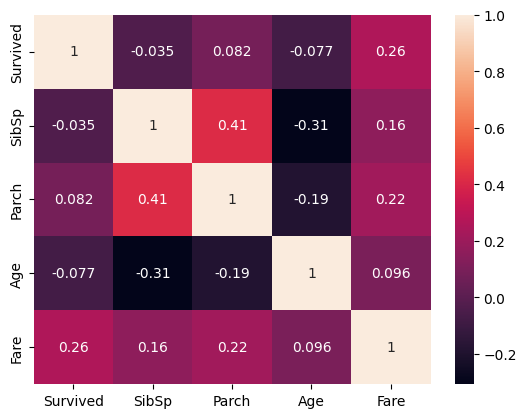

In [18]:
heatmap=sns.heatmap(df[['Survived','SibSp','Parch','Age','Fare']].corr(),annot=True)

###Fare seems to have higher correlation but doesn't mean other params don't have significance we need to explore in details

In [19]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

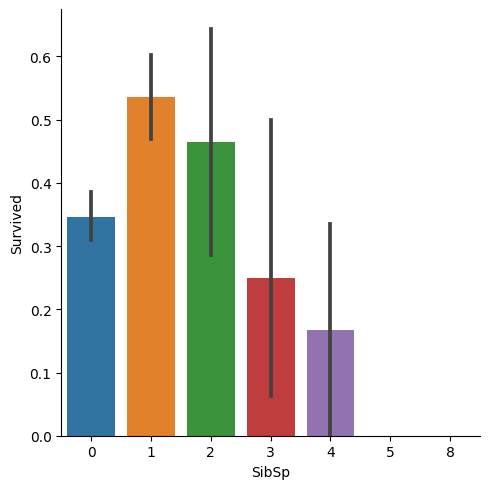

In [23]:
bargraph_sibsp=sns.catplot(x='SibSp',y='Survived',data=df,kind='bar')

passengers with more siblings have lesser survival rate 

survival is higher for passengers with 1 or 2 siblings

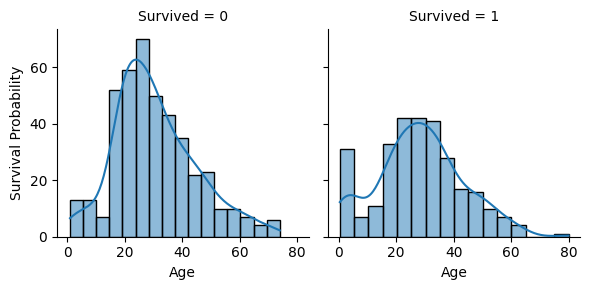

In [29]:
age_visual=sns.FacetGrid(df,col='Survived')
age_visual=age_visual.map(sns.histplot,'Age',kde=True)
age_visual=age_visual.set_ylabels('Survival Probability')

Young people have higher chances of survival

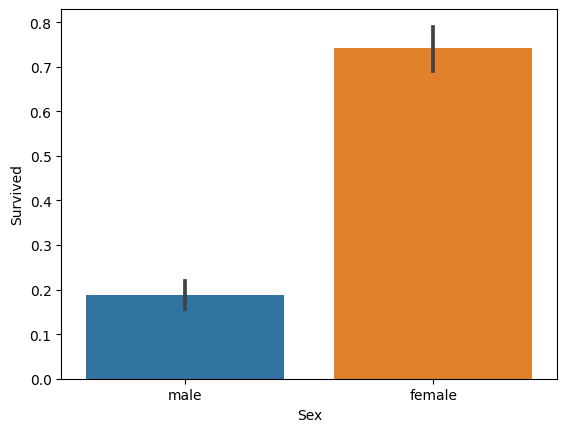

In [32]:
sex_plot=sns.barplot(x='Sex',y='Survived',data=df)

In [36]:
df[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


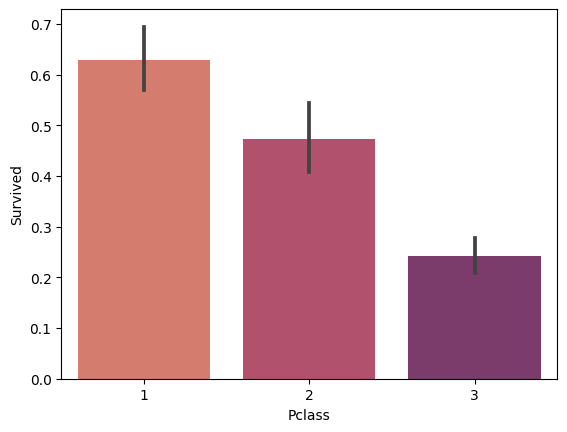

In [38]:
pclass_plot=sns.barplot(x='Pclass',y='Survived',data=df,palette='flare')

higher class passengers have higher rate of survival

pclass vs survived by sex

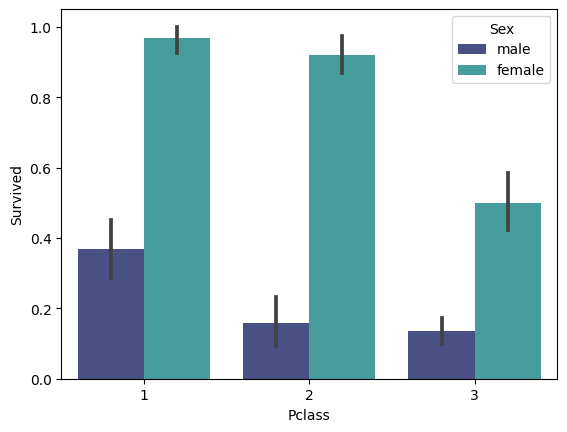

In [40]:
pclass_sex_plot=sns.barplot(x='Pclass',y='Survived',hue='Sex',data=df,palette='mako')

in each class females have higher chance but taking entire population higher class means higher survival

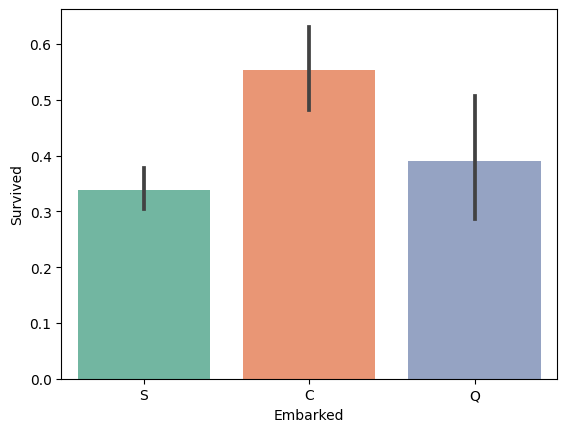

In [43]:
embarked_plot=sns.barplot(x='Embarked',y='Survived',data=df,palette='Set2')

passengers embarking from C have higher chance of survival

embarked vs pclass

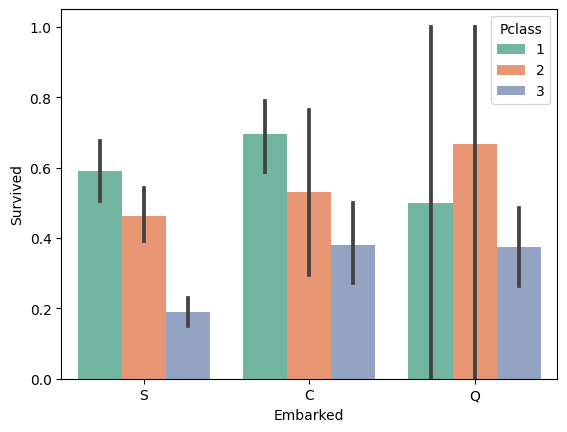

In [52]:
embarked_pclass_plot=sns.barplot(x='Embarked',y='Survived',hue='Pclass',data=df,palette='Set2')

Most of C class were in first class so they have higher survival rate

In [53]:
mean=df['Age'].mean()
std=df['Age'].std()

In [55]:
#dealing with age null values
isnull_age=df['Age'].isnull().sum()

rand_age=np.random.randint(mean-2*std,mean+2*std,size=isnull_age)
age_slice=df['Age'].copy()
age_slice[np.isnan(age_slice)]=rand_age

In [56]:
age_slice.isnull().sum()

0

In [57]:
df['Age']=age_slice

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [59]:
df.drop('PassengerId',axis=1,inplace=True)

In [60]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Dealing with categorical data

In [62]:
genders={"male":0,"female":1}
df['Sex']=df['Sex'].map(genders)

In [63]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [64]:
ports={"S":0,"C":1,"Q":2}
df['Embarked']=df['Embarked'].map(ports)

In [65]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


Splitting the data

In [66]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [71]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

#Classification

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [73]:
logreg=LogisticRegression()
svc=SVC()
dtree=DecisionTreeClassifier()
knn=KNeighborsClassifier(5)
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=20)

In [75]:
logreg.fit(x_train,y_train)
svc.fit(x_train,y_train)
dtree.fit(x_train,y_train)
knn.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=20)

In [76]:
logreg_predict=logreg.predict(x_test)
svc_predict=svc.predict(x_test)
dtree_predict=dtree.predict(x_test)
knn_predict=knn.predict(x_test)
rf_predict=rf.predict(x_test)


In [77]:
from sklearn.metrics import accuracy_score

In [78]:
print("Accuracy of Logistic Regression: ",(accuracy_score(logreg_predict,y_test))*100)
print("Accuracy of SVM: ",(accuracy_score(svc_predict,y_test))*100)
print("Accuracy of Decision Tree: ",(accuracy_score(dtree_predict,y_test))*100)
print("Accuracy of Random Forest: ",(accuracy_score(rf_predict,y_test))*100)
print("Accuracy of KNN: ",(accuracy_score(knn_predict,y_test))*100)

Accuracy of Logistic Regression:  80.44692737430168
Accuracy of SVM:  82.68156424581005
Accuracy of Decision Tree:  79.3296089385475
Accuracy of Random Forest:  83.24022346368714
Accuracy of KNN:  82.12290502793296
